In [100]:
import skbio
from skbio import TreeNode, DistanceMatrix, Alignment
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [101]:
aln = Alignment.read("../data/all_genomes.fasta")

In [102]:
dist = aln.distances()

In [103]:
1/dist['K']["ABCDEFGHIJKL".index("D")]

1131.4309954751131

In [104]:
samp = skbio.read("../data/sample.nwk", into=TreeNode)

In [105]:
tdist = samp.tip_tip_distances()

In [106]:
num_runs = 3
runs = DistanceMatrix(
    np.repeat(np.repeat(dist.data,num_runs, axis=1), num_runs, axis=0))
runs.ids = ['{}-{}'.format(g, i) for g in dist.ids for i in range(num_runs)]
runs.write("../data/runs.dist")

'../data/runs.dist'

In [107]:
truth = runs.condensed_form()

In [108]:
kwip_mat = DistanceMatrix.read("../data/kwip/0.1.10/0.1.10-20x-wip.dist")

In [109]:
ip_mat = DistanceMatrix.read("../data/kwip/0.1.10/0.1.10-20x-ip.dist")

In [110]:
wip = kwip_mat.condensed_form()
ip = ip_mat.condensed_form()

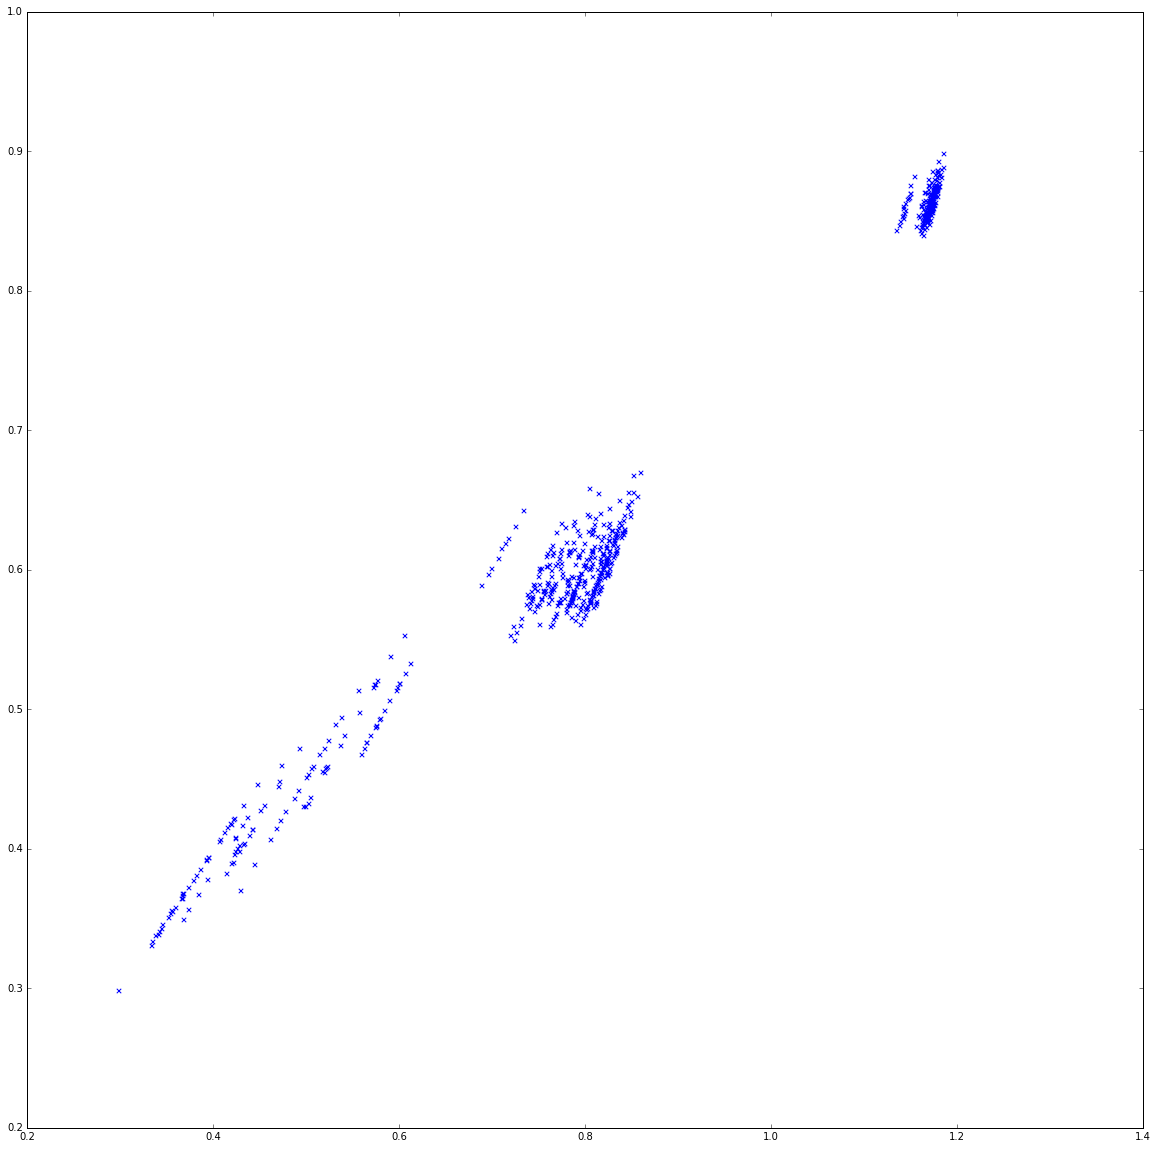

In [111]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(wip, ip, marker='x')

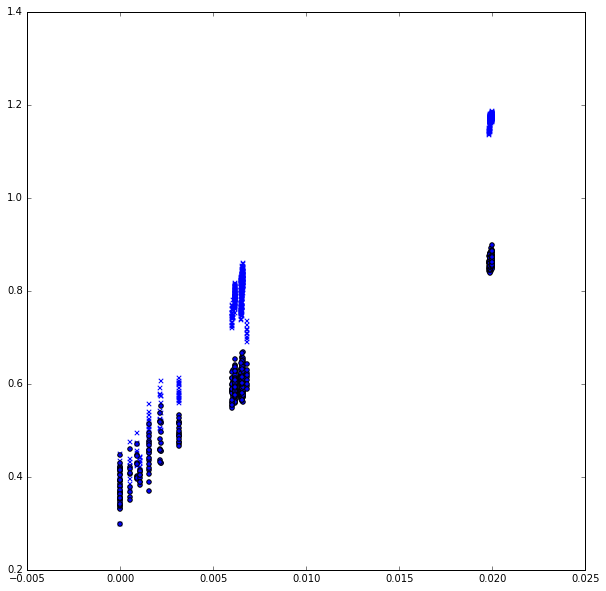

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(truth, wip, marker='x')
ax.scatter(truth, ip, marker='o')

In [117]:
X = sm.add_constant(truth)
y = wip
o = sm.OLS(y, X)
f = o.fit()
f.summary()
print f.rsquared_adj, f.ssr

0.922899346617 2.90723406102


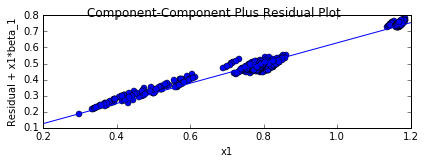

In [114]:
_ =sm.graphics.plot_ccpr_grid(f)